# We Rate Dogs - Project  on Data Wrangling

## Table of contents
1. Introduction
2. Data Gathering
3. Data assesment
4. Data cleaning
5. Data storing
6. Data Analysis
7. Conclussion
8. References

### Introduction
In this project I am going to work with three types of data pieces gatherd from the WeRateDogs(dog_rates) twitter account that rates dogs. As a trained veterinarian and a lover of dogs, the account is interesting beacuse it rates dogs with a funny comment about the dog and the rating style is catchy because most oftenly the numerator exceeds the denominator. I will gather the data, assess each dataset, clean and merge the data into one dataframe, then perform analysis and visualizations

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# first step is to laod the library that I will requre to download the first dataset
import pandas as pd

In [2]:
# Loading the dataset using pandas in the work space
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Viewing the head of the loaded dataset
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
# import request library to programatically download the second dataset file from the udacity's servers
# OS provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.
import requests
import os

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

#creating the folder image predictions where we will store the data
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#Downloading the image_predictions tab seperated values programatically
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
respose
#opening with 'write binary' because the image prediction file is in bites and not text.
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

NB: The code above did not work in my local machine. It was sending an 'ssl error' but was working on the online classroom provided work space.
To solve the error I worked with the code on the online work space , downloded the image_prediction tsv file and saved it to my local working space.
I then loaded the data to my notebook using the code below

In [5]:
# Loading the downloded data to the work space
image_prediction = pd.read_csv('image-prediction.tsv',sep='\t')  

#viewing the head of the dataset
image_prediction.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# loading all the library that I require to query twitter APIs
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import time

In [7]:
# Querying Twitter API for the we rate dogs twitter archive and saving in a JSON text file
# The keys and secrets are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit=True)


In [8]:
# autheticating the keys
try:
    api.verify_credentials()
    print('Successful Authentication')
except:
    print('Failed authentication')

Successful Authentication


In [9]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
tweet_ids = archive.tweet_id.values
#tweet_ids = twitter_archive['tweet_id']
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
no_of_tweets_found = []
no_of_tweets_not_found = []
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            no_of_tweets_found.append(tweet)
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        #except tweepy.TweepError as e:
        #except tweepy.errors.TweepyException as e:
        #https://docs.tweepy.org/en/stable/exceptions.html
        except tweepy.TweepyException as e:
            no_of_tweets_not_found.append(tweet)
            print("Fail", e)
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail 404 Not Found
144 - No status found with that ID.
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
3

Success
245: 846042936437604353
Success
246: 845812042753855489
Success
247: 845677943972139009
Success
248: 845459076796616705
Fail 404 Not Found
144 - No status found with that ID.
249: 845397057150107648
Success
250: 845306882940190720
Success
251: 845098359547420673
Success
252: 844979544864018432
Success
253: 844973813909606400
Success
254: 844704788403113984
Fail 404 Not Found
144 - No status found with that ID.
255: 844580511645339650
Success
256: 844223788422217728
Success
257: 843981021012017153
Success
258: 843856843873095681
Success
259: 843604394117681152
Success
260: 843235543001513987
Success
261: 842892208864923648
Fail 404 Not Found
144 - No status found with that ID.
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 84131466519608

Success
491: 813812741911748608
Success
492: 813800681631023104
Success
493: 813217897535406080
Success
494: 813202720496779264
Success
495: 813187593374461952
Success
496: 813172488309972993
Success
497: 813157409116065792
Success
498: 813142292504645637
Success
499: 813130366689148928
Success
500: 813127251579564032
Success
501: 813112105746448384
Success
502: 813096984823349248
Success
503: 813081950185472002
Success
504: 813066809284972545
Success
505: 813051746834595840
Success
506: 812781120811126785
Success
507: 812747805718642688
Fail 404 Not Found
144 - No status found with that ID.
508: 812709060537683968
Success
509: 812503143955202048
Success
510: 812466873996607488
Success
511: 812372279581671427
Success
512: 811985624773361665
Success
513: 811744202451197953
Success
514: 811647686436880384
Success
515: 811627233043480576
Success
516: 811386762094317568
Success
517: 810984652412424192
Success
518: 810896069567610880
Success
519: 810657578271330305
Success
520: 810284430598

Success
745: 780192070812196864
Success
746: 780092040432480260
Success
747: 780074436359819264
Success
748: 779834332596887552
Success
749: 779377524342161408
Success
750: 779124354206535695
Success
751: 779123168116150273
Fail 404 Not Found
144 - No status found with that ID.
752: 779056095788752897
Success
753: 778990705243029504
Success
754: 778774459159379968
Success
755: 778764940568104960
Success
756: 778748913645780993
Success
757: 778650543019483137
Success
758: 778624900596654080
Success
759: 778408200802557953
Success
760: 778396591732486144
Success
761: 778383385161035776
Success
762: 778286810187399168
Success
763: 778039087836069888
Success
764: 778027034220126208
Success
765: 777953400541634568
Success
766: 777885040357281792
Success
767: 777684233540206592
Success
768: 777641927919427584
Success
769: 777621514455814149
Success
770: 777189768882946048
Success
771: 776819012571455488
Success
772: 776813020089548800
Success
773: 776477788987613185
Success
774: 776249906839

Rate limit reached. Sleeping for: 155


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1152: 725842289046749185
Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
11

Success
1401: 699446877801091073
Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
14

Success
1650: 683742671509258241
Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
16

Rate limit reached. Sleeping for: 145


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [10]:
# Writing each tweet's JSON data in its own line
json_list = []
with open('tweet-json.txt','r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets ['retweet_count']
        favorite_count = tweets['favorite_count']
        
        json_list.append({'tweet_id': tweet_id,
                         'retweet_count': retweet_count,
                          'favorite_count': favorite_count,
                         })
        
#reading the .txt file line by line into pandas DataFrame with tweet 
df_json_tweet = pd.DataFrame(json_list,columns=['tweet_id','retweet_count','favorite_count'])

#viewing the head of the json file
df_json_tweet.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


## Assessing Data
The objective in this section is to identify eight (8) quality issues and two (2) tidiness issue from the three datasets uisng  visual assessment and programmatic assessement.

### Quality issues
archive table

1. Under the dog name column, some names were indicated as none. I dropped all nones.
2. Extract real dog names from the text to replace the a's that did not seem like the real dog names

3.rating denominators not equal to 10

4.columns with alot of missing values and will not be needed for analysis including; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls needs to be dropped
5. change timestamp datatype from a string to date and time

Image prediction dataset

6. Drop url column from image prediction data frame

twitter_API data

7. dropping columns representing individual dog columns

8. Removing rows where retweet_status is not null

8.drop all na's in the master dataset

### Tidiness issues

Image prediction dataset
1. Replace column p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog  names could be replaced with better easy to understand names

2. Dog stages can be represented in one column instead of having 4 columns majority of which were indicated with none values

3. Merge the three datasets together after cleaning to make one complete dataset

### visual assessment

In [11]:
# calling the whole dataset
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
# viewing the first five rows of the dataset
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
# getting the summary of the archive dataframe
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### programatic assessment

In [14]:
# randonly viewing a sample of the dataset entries
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
917,756939218950160384,NaN,NaN,2016-07-23 19:49:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He is a majestic mountain pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756939218...,12,10,Jax,None,None,pupper,None
2088,670792680469889025,NaN,NaN,2015-11-29 02:33:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Antony. He's a Sheraton Tetrahedron. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670792680...,7,10,Antony,None,None,None,None
1895,674742531037511680,6.747400e+17,4.196984e+09,2015-12-10 00:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Some clarification is required. The dog is sin...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
973,750071704093859840,NaN,NaN,2016-07-04 21:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pause your cookout and admire this pupper's ni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750071704...,10,10,None,None,None,pupper,None
972,750086836815486976,NaN,NaN,2016-07-04 22:00:12 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Spanky. He was a member of the 2002 US...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750086836...,12,10,Spanky,None,None,None,None


In [15]:
# counts in a column of archive table
archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
# value counts of the rating_denominator of the archive dataset
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

### visual assessment of the second dataset

In [17]:
# calling the image_prediction dataset for visual assessment
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### progaramatic assesment

In [18]:
# getting the summary of the image_prediction dataframe
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# Viewing a random sample of the dataframe
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1107,723673163800948736,https://pbs.twimg.com/media/CgsA5eFWgAAu0qn.jpg,1,golden_retriever,0.839390,True,Labrador_retriever,0.065706,True,hand_blower,0.012941,False
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
1643,808001312164028416,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,Labrador_retriever,0.730959,True,Staffordshire_bullterrier,0.130726,True,American_Staffordshire_terrier,0.028853,True
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
1801,831939777352105988,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1,Pomeranian,0.153862,True,marmot,0.091234,False,grey_fox,0.090644,False
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
1462,778383385161035776,https://pbs.twimg.com/media/Cs1fjyqWIAE2jop.jpg,1,collie,0.345266,True,borzoi,0.312823,True,Border_collie,0.213011,True
864,697270446429966336,https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg,1,toy_poodle,0.880014,True,miniature_poodle,0.100136,True,Norfolk_terrier,0.007027,True
1445,775842724423557120,https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg,2,chow,0.520022,True,bath_towel,0.028775,False,French_bulldog,0.025990,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True


In [20]:
# getting the value counts of the p1 from the dataframe
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

### visual assessment

In [21]:
# callinng the Json file for visual assessment
df_json_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [22]:
# getting the summary of the json_tweet dataframe
df_json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [23]:
# viewing a sample of the Json file data
df_json_tweet.sample(30)

,tweet_id,retweet_count,favorite_count
374,828361771580813312,195,2408
744,780092040432480260,2655,0
1024,746131877086527488,2511,7565
1631,684241637099323392,3727,8999
268,841320156043304961,6080,21402
702,785927819176054784,3652,12696
1963,673345638550134785,1422,2700
1489,692894228850999298,910,2511
117,869988702071779329,25661,0
1989,672622327801233409,542,1377


In [24]:
# getting the count of values in the Json_tweet dataframe column named retweet_count
df_json_tweet['retweet_count'].value_counts()

1972    5
3652    5
83      5
1207    4
336     4
       ..
3357    1
3018    1
2181    1
848     1
147     1
Name: retweet_count, Length: 1724, dtype: int64

In [25]:
# getting the count of values in the Json_tweet dataframe column named favourite_count
df_json_tweet['favorite_count'].value_counts()

0       179
2706      3
2918      3
610       3
2768      3
       ... 
7493      1
6671      1
4484      1
2872      1
2535      1
Name: favorite_count, Length: 2007, dtype: int64

In [26]:
all_columns = pd.Series(list(archive) + list(image_prediction) + list(df_json_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [27]:
all_columns = pd.Series(list(archive) + list(image_prediction))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

## 1. Quality Issues

In [104]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_prediction_clean = image_prediction.copy()
twitter_api_clean = df_json_tweet.copy()

In [105]:
# Caalling the archive dataframe copy
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [106]:
# caliing the image predictions data frame copy
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [107]:
# Calling the api dataframe copy
twitter_api_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [108]:
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [109]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [110]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #1:

#### 1. Majority of the dog names were identified as none. Drop all the none values

#### Code

In [111]:
# getting the value counts of the name column
archive_clean['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [112]:
# replacing the nomes under dog column with blanks
archive_clean['name'].replace('None', '', inplace=True)

### Issue 2

### extract real dog names from the text

In [113]:
# extracting groups having any capital letter # followed by 'i' and any other character
# link:https://www.geeksforgeeks.org/python-pandas-series-str-extract/
#Replacing the nones with NA's
archive_clean['name'] = archive_clean.text.str.extract(
    "((?<= named )[A-Z][a-z]+| (?<= [i,']s )[A-Z][a-z]+| (?<=[M,m]eet )[A-Z][a-z]+| (?<= to )[A-Z][a-z]+)", expand = True)

#### Test

In [114]:
# viewing a sample of the new extracted column called dog_
archive_clean.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
918,756651752796094464,NaN,NaN,2016-07-23 00:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gert. He just wants you to be happy. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756651752...,11,10,Gert,None,None,None,None
1101,735635087207878657,NaN,NaN,2016-05-26 00:54:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He hasn't grow into his skin y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735635087...,11,10,Dakota,None,None,None,None
1233,712809025985978368,NaN,NaN,2016-03-24 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stubert. He just arrived. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,None,None,None,None
1513,691096613310316544,NaN,NaN,2016-01-24 03:14:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see one dog giving a puptalk to anothe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691096613...,11,10,NaN,None,None,None,None
612,796904159865868288,NaN,NaN,2016-11-11 02:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Tyrone. He's a leaf wiz...,6.873173e+17,4.196984e+09,2016-01-13 16:56:30 +0000,https://twitter.com/dog_rates/status/687317306...,11,10,Tyrone,None,None,None,None
217,850380195714523136,NaN,NaN,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,None,None,None,None


In [115]:
# viewing the value counts of the new created column dog_counts
archive_clean['name'].value_counts()

 Charlie     12
 Oliver      12
 Lucy        11
 Cooper      11
 Tucker      10
             ..
 Storkson     1
 Remy         1
 Chadrick     1
 Kellogg      1
 Netflix      1
Name: name, Length: 961, dtype: int64

### Issue 3

#### rating denominators not equal to 10. Change the denominator values that are not 10 to 10

In [116]:
archive_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [117]:
# use 'replace' function 
# link:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

archive_clean['rating_denominator'] = archive_clean['rating_denominator'].replace([11, 50, 20, 80, 70, 7, 15, 150, 170, 0, 90, 40, 130, 110, 16, 120, 2], 10)

In [118]:
# checkng the value counts of the rating denominatior column
archive_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [119]:
archive_clean.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429...,5,10,NaN,None,None,None,None
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When she says you're a good boy...,7.916723e+17,4.196984e+09,2016-10-27 16:06:04 +0000,https://twitter.com/dog_rates/status/791672322...,13,10,NaN,None,None,None,None
1752,678969228704284672,NaN,NaN,2015-12-21 16:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. She's a Metamorphic Chartreuse. Pla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678969228...,11,10,Lola,None,None,None,None
812,771136648247640064,NaN,NaN,2016-09-01 00:04:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dixie. She wants to be a ship captain....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771136648...,11,10,Dixie,None,None,None,None
886,759943073749200896,NaN,NaN,2016-08-01 02:45:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a wicked fast pupper. 12/10 camera coul...,NaN,NaN,NaN,https://vine.co/v/5AJm5pq7Kav,12,10,NaN,None,None,pupper,None
597,798694562394996736,NaN,NaN,2016-11-16 01:09:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what's happening h...,7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000,https://twitter.com/dog_rates/status/701214700...,12,10,NaN,None,None,None,None


### Issue 4

#### removing rows where retweet status id count is not null

In [120]:
# This removes the retweets in the tweet json by removing all rows where retweet_status is not null. 
print(archive_clean['retweeted_status_id'].notnull().sum())
archive_clean = archive_clean[archive_clean ['retweeted_status_id'].isna()]
# Below checks the retweets have been effectively removed.
archive_clean['retweeted_status_id'].notnull().sum()

181


0

#### removing rows where retweeted status user id is not null

In [121]:
# This removes the retweets in the tweet json by removing all rows where retweet_status is not null. 
print(archive_clean['retweeted_status_user_id'].notnull().sum())
archive_clean = archive_clean[archive_clean ['retweeted_status_user_id'].isna()]
# Below checks the retweets have been effectively removed.
archive_clean['retweeted_status_user_id'].notnull().sum()

0


0

#### removing rows where retweeted status timestamp is not null

In [122]:
# This removes the retweets in the tweet json by removing all rows where retweet_status is not null. 
print(archive_clean['retweeted_status_timestamp'].notnull().sum())
archive_clean = archive_clean[archive_clean ['retweeted_status_timestamp'].isna()]
# Below checks the retweets have been effectively removed.
archive_clean['retweeted_status_timestamp'].notnull().sum()

0


0

### Issue 4

#### Drop the columns with alot of missing values and will not be needed for analysis including; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls needs to be dropped

In [123]:
# dropping the columns that will not be needed during the anlysis using drop function
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

In [124]:
archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,Netflix,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,NaN,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,NaN,None,None,None,None


In [125]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                1427 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### issue 5

#### timestamp datatype change from a string to timestamp

In [126]:
# checking the datatype
archive_clean.timestamp.dtypes

dtype('O')

In [127]:
# converting timestamp to datetime datatype
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
archive_clean['timestamp']= pd.to_datetime(archive_clean['timestamp'])


In [128]:
archive_clean.timestamp.dtypes

datetime64[ns, UTC]

### Issue 6

####  drop the jpg_url column since we dont need it and it was previously droped from the aerchive dataset

In [129]:
image_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
725,686050296934563840,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,1,Pomeranian,0.985789,True,keeshond,0.004083,True,Pekinese,0.003334,True
1438,774314403806253056,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,3,Eskimo_dog,0.596045,True,Siberian_husky,0.223067,True,Saluki,0.036325,True
1589,798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
1522,788070120937619456,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
1163,735137028879360001,https://pbs.twimg.com/media/CjO7OfeWgAAUQy-.jpg,1,Walker_hound,0.413535,True,beagle,0.233891,True,English_foxhound,0.164943,True


In [130]:
# droping the jpg_url column
image_prediction_clean = image_prediction_clean.drop('jpg_url', axis = 1)

In [131]:
image_prediction_clean.sample(5)

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
368,672968025906282496,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True
1303,753026973505581056,3,Pembroke,0.868511,True,Cardigan,0.103708,True,Shetland_sheepdog,0.018142,True
1970,868880397819494401,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1780,828650029636317184,1,golden_retriever,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True
1727,820446719150292993,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True


## twitter_api_clean dataset

### Issue 7

### Drop retweet count column

In [132]:
# Viewing a sample of twitter api data
twitter_api_clean.sample(2)

,tweet_id,retweet_count,favorite_count
704,785639753186217984,2561,8735
2203,668633411083464705,1788,3024


In [133]:
#### Drop the retweet count column
twitter_api_clean.drop(["retweet_count"], inplace=True, axis=1)

In [134]:
# Viewing a sample of twitter api data
twitter_api_clean.sample(2)

,tweet_id,favorite_count
1211,715220193576927233,2630
1540,689599056876867584,12795


## 2. Tidiness Isues

### issue 1

Replace column p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog names could be replaced with better easy to understand names

In [135]:
# renaming columns for easy of understanding
# link: https://www.statology.org/pandas-rename-columns/
image_prediction_clean.rename(columns = {'p1':'first_dog', 'p1_conf':'confidence_1', 'p1_dog':'prediction_1', 
                                        'p2':'second_dog', 'p2_conf':'confidence_2', 'p2_dog':'prediction_2',
                                         'p3':'third_dog', 'p3_conf':'confidence_3', 'p3_dog':'prediction_3'}, inplace=True)

In [136]:
image_prediction_clean.sample(5)

,tweet_id,img_num,first_dog,confidence_1,prediction_1,second_dog,confidence_2,prediction_2,third_dog,confidence_3,prediction_3
2034,883838122936631299,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
1925,857393404942143489,3,malamute,0.841597,True,Siberian_husky,0.073644,True,Eskimo_dog,0.072129,True
1337,758405701903519748,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
51,666983947667116034,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
1569,794355576146903043,1,cocker_spaniel,0.500509,True,golden_retriever,0.272734,True,jigsaw_puzzle,0.041476,False


### Issue2

#### replacing the None in the dog stages columns with a blank

In [137]:
# replacing the 'None' in the dog stage columns with a blank
# link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
archive_clean['doggo'].replace('None', '', inplace=True)
archive_clean['floofer'].replace('None', '', inplace=True)
archive_clean['pupper'].replace('None', '', inplace=True)
archive_clean['puppo'].replace('None', '', inplace=True)

In [138]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
71,878776093423087618,2017-06-25 00:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,13,10,Snoopy,,,,puppo
1714,680440374763077632,2015-12-25 17:30:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,11,10,NaN,,,,
883,760252756032651264,2016-08-01 23:15:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,4,10,Fido,,,,
16,888917238123831296,2017-07-23 00:22:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,12,10,Jim,,,,
1485,693155686491000832,2016-01-29 19:36:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dunkin. He can only see when he's wet ...,12,10,Dunkin,,,,


#### Dog stages can be represented in one column instead of having 4 columns majority of which were indicated with none values

In [139]:
#Create a new column for dog stage and fill it with the data in the 4 columns
# link :https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [140]:
archive_clean['dog_stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

### Issue 7

In [141]:
#### dropping the 4 columns representing dog stages individually

In [142]:
# dropping the dog stages columns and retain the one column with all the stages in one column
# link :https://www.educative.io/answers/how-to-delete-a-column-in-pandas
archive_clean.drop(["doggo","floofer","pupper","puppo"], inplace=True, axis=1)

In [143]:
# viewing a sample of the data
archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
419,822244816520155136,2017-01-20 00:50:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,11,10,NaN,
1551,689143371370250240,2016-01-18 17:52:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,10,10,Trip,pupper
836,767884188863397888,2016-08-23 00:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tito. He's on the lookout. Nobody know...,10,10,Tito,
2137,670046952931721218,2015-11-27 01:10:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ben &amp; Carson. It's impossible for ...,11,10,Ben,
1580,687127927494963200,2016-01-13 04:23:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,9,10,Gordon,


### Issue 3

Merge the three datasets together after cleaning to make one complete dataset

In [144]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                1427 non-null   object             
 7   dog_stage           2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 152.9+ KB


In [145]:
# merging datasets using tweet id column on all the three datasets
#https://pandas.pydata.org/docs/user_guide/merging.html
# first I merge the cleaned archive dataset with the cleaned image prediction dataset
archive_clean_master = pd.merge(archive_clean, image_prediction_clean, on='tweet_id', how='outer')

In [146]:
archive_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2255
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2256 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                1427 non-null   object             
 7   dog_stage           2175 non-null   object             
 8   img_num             2075 non-null   float64            
 9   first_dog           2075 non-null   object             
 10  confidence_1        2075 non-null   float64            
 11  prediction_1        2075 non-null   object             
 12  second_dog          2075 non-null 

In [147]:
# merging the already combined cleaned archive dataset and image dataset with the cleaned twitter api dataset
twitter_archive_master = pd.merge(archive_clean_master, twitter_api_clean, on='tweet_id',how='outer')

In [148]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                1427 non-null   object             
 7   dog_stage           2175 non-null   object             
 8   img_num             2075 non-null   float64            
 9   first_dog           2075 non-null   object             
 10  confidence_1        2075 non-null   float64            
 11  prediction_1        2075 non-null   object             
 12  second_dog          2075 non-null 

### Issue 8

#### Dropping all the na's

In [149]:
# checkin the culumns with na values and their sum
twitter_archive_master.isnull().sum()

tweet_id                0
timestamp             181
source                181
text                  181
rating_numerator      181
rating_denominator    181
name                  929
dog_stage             181
img_num               281
first_dog             281
confidence_1          281
prediction_1          281
second_dog            281
confidence_2          281
prediction_2          281
third_dog             281
confidence_3          281
prediction_3          281
favorite_count          2
dtype: int64

In [150]:
# dropping na's
twitter_archive_master.dropna(inplace=True) 
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 2171
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1384 non-null   int64              
 1   timestamp           1384 non-null   datetime64[ns, UTC]
 2   source              1384 non-null   object             
 3   text                1384 non-null   object             
 4   rating_numerator    1384 non-null   float64            
 5   rating_denominator  1384 non-null   float64            
 6   name                1384 non-null   object             
 7   dog_stage           1384 non-null   object             
 8   img_num             1384 non-null   float64            
 9   first_dog           1384 non-null   object             
 10  confidence_1        1384 non-null   float64            
 11  prediction_1        1384 non-null   object             
 12  second_dog          1384 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [151]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [152]:
#Loading the stored dataset the dataset
Master_data = pd.read_csv('twitter_archive_master.csv')

In [153]:
# viewing the first five rows of the master dataset

In [154]:
Master_data.head()

,Unnamed: 0,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,img_num,first_dog,confidence_1,prediction_1,second_dog,confidence_2,prediction_2,third_dog,confidence_3,prediction_3,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0
1,1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0
2,2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0
3,3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0
4,4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0


In [155]:
Master_data.shape

(1384, 20)

In [156]:
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1384 non-null   int64  
 1   tweet_id            1384 non-null   int64  
 2   timestamp           1384 non-null   object 
 3   source              1384 non-null   object 
 4   text                1384 non-null   object 
 5   rating_numerator    1384 non-null   float64
 6   rating_denominator  1384 non-null   float64
 7   name                1384 non-null   object 
 8   dog_stage           179 non-null    object 
 9   img_num             1384 non-null   float64
 10  first_dog           1384 non-null   object 
 11  confidence_1        1384 non-null   float64
 12  prediction_1        1384 non-null   bool   
 13  second_dog          1384 non-null   object 
 14  confidence_2        1384 non-null   float64
 15  prediction_2        1384 non-null   bool   
 16  third_

In [157]:
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1384 non-null   int64  
 1   tweet_id            1384 non-null   int64  
 2   timestamp           1384 non-null   object 
 3   source              1384 non-null   object 
 4   text                1384 non-null   object 
 5   rating_numerator    1384 non-null   float64
 6   rating_denominator  1384 non-null   float64
 7   name                1384 non-null   object 
 8   dog_stage           179 non-null    object 
 9   img_num             1384 non-null   float64
 10  first_dog           1384 non-null   object 
 11  confidence_1        1384 non-null   float64
 12  prediction_1        1384 non-null   bool   
 13  second_dog          1384 non-null   object 
 14  confidence_2        1384 non-null   float64
 15  prediction_2        1384 non-null   bool   
 16  third_

### Insights:
1. Which dog stage had the highest numerator rating
2. which dog name had the highest retweet count 
3. the dog with the highest favorite count


In [158]:
# importing the required libraries for data analysis and visualisations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

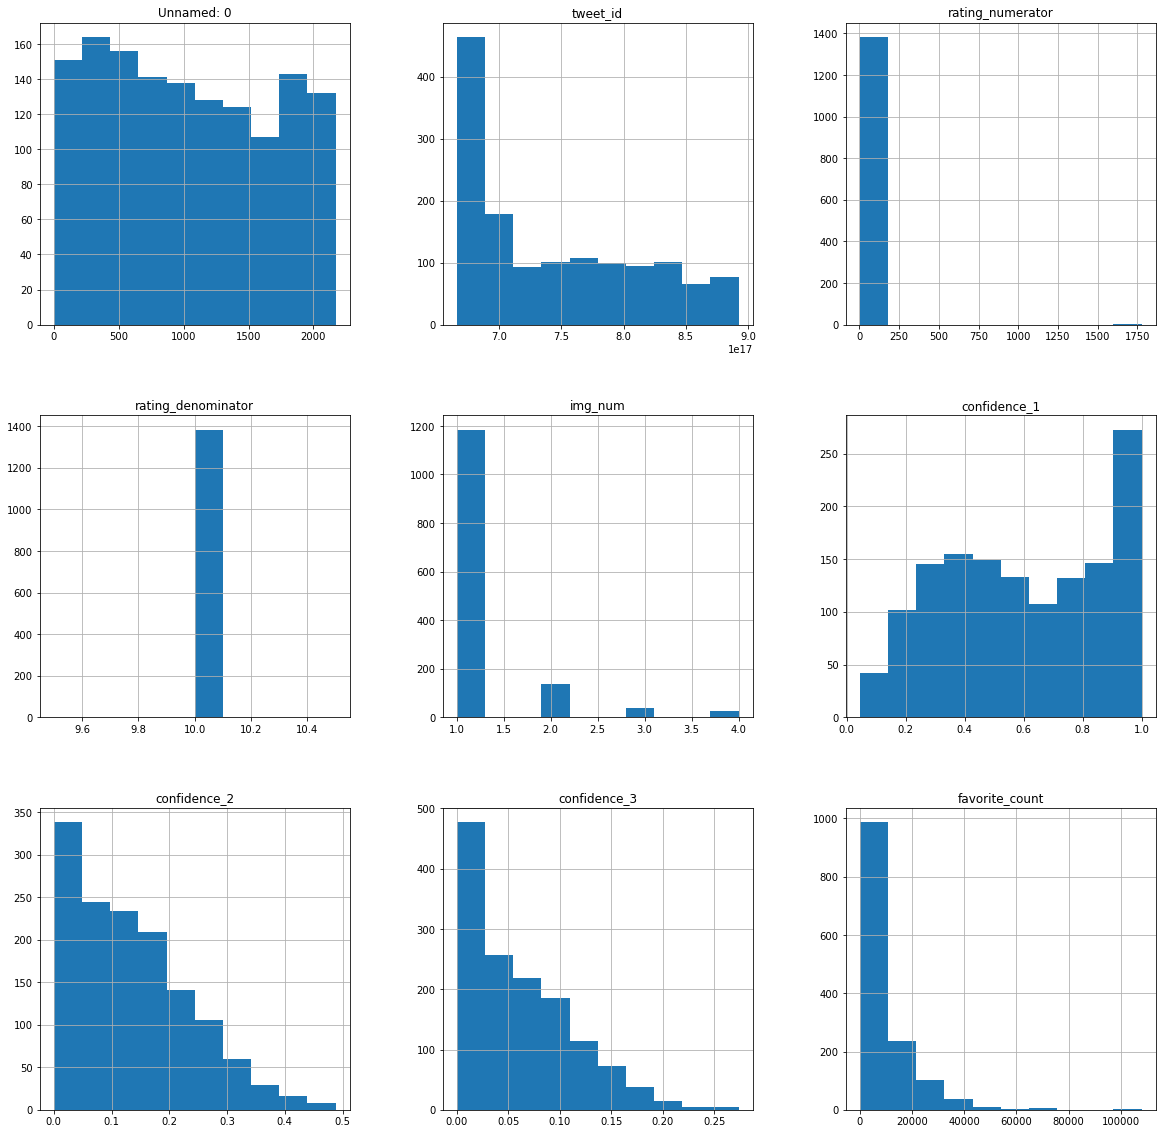

In [159]:
# visualizing different columns of the dataset
Master_data.hist(figsize=(20,20));

In [160]:
Master_data.sample(2)

,Unnamed: 0,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,img_num,first_dog,confidence_1,prediction_1,second_dog,confidence_2,prediction_2,third_dog,confidence_3,prediction_3,favorite_count
1243,1943,670403879788544000,2015-11-28 00:48:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,10.0,10.0,Nigel,NaN,1.0,pug,0.802223,True,French_bulldog,0.172557,True,bull_mastiff,0.007163,True,460.0
211,299,830956169170665475,2017-02-13 01:46:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Reggie. He hates puns. 12/10 ligh...,12.0,10.0,Reggie,NaN,1.0,kuvasz,0.451516,True,golden_retriever,0.317196,True,English_setter,0.132759,True,8735.0


### 1. Which dog stage had the highest numerator rating


In [161]:
Master_data['dog_stage'].value_counts()

pupper         117
doggo           37
puppo           16
floofer          5
doggopupper      4
Name: dog_stage, dtype: int64

In [162]:
# Calculating the averave mean rating per dog stage
Master_data.groupby('dog_stage').rating_numerator.mean()

dog_stage
doggo          12.027027
doggopupper    11.750000
floofer        11.600000
pupper         10.401709
puppo          11.875000
Name: rating_numerator, dtype: float64

In [163]:
# Sorting the rating means in an ascending order
rating_order = Master_data.groupby('dog_stage').rating_numerator.mean().to_frame('mean_rating').sort_values(by='mean_rating',ascending=False)

In [164]:
# plotting the mean rating values in an ascending order

Text(0, 0.5, 'Rating Mean')

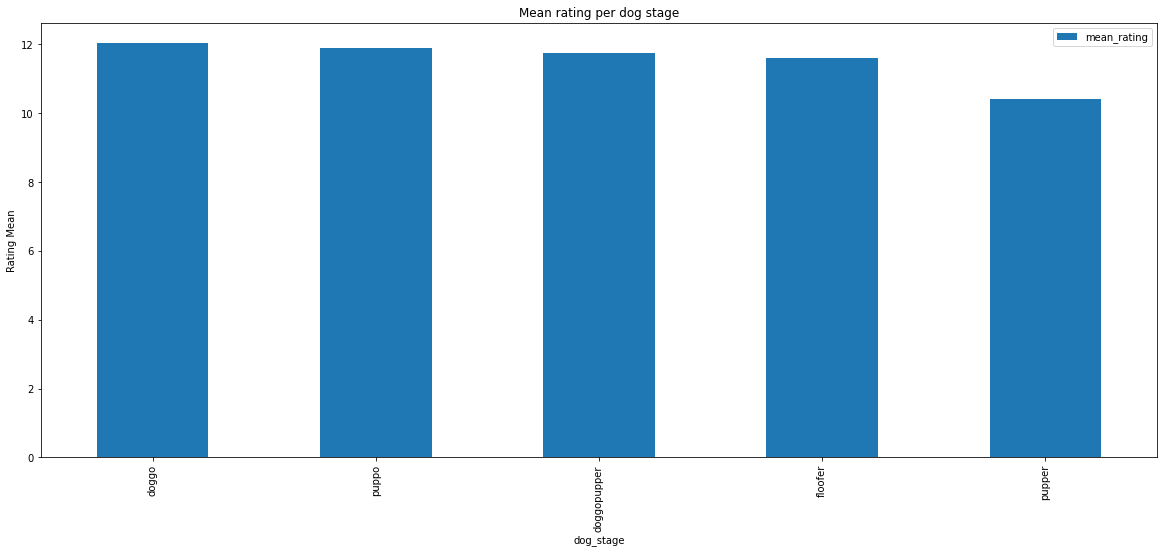

In [165]:
rating_order.plot(title='Mean rating per dog stage',figsize=(20,8),kind='bar')
plt.xlabel('dog_stage')
plt.ylabel('Rating Mean')

#### Results

Among the various dog stages, dogs at the doggo stage had the highest mean rating and pupper the lowest mean rating as seen in the bar graaph above

### 2. What is the relationship between favourite count and rating numerator

In [166]:
# defining a function
def label(x,y,t):

    '''
    Args:
    x(str):x-axis title
    y(str):y-axis title
    t(str): main title

    Returns:
    None

    '''
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

<AxesSubplot:xlabel='rating_numerator', ylabel='favorite_count'>

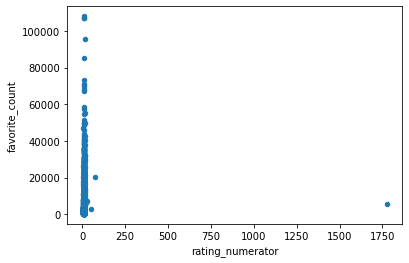

In [167]:
# Plotting a scatter graph to show the relationship between retweet count and favorite count
Master_data.plot.scatter(x="rating_numerator", y="favorite_count" )

#### Results

Numerator rating does not seem to be associated with favorite counts given. We however can't make a conclusion because of the one outliers in the dataset which affects a clear distinction of the direction of the curve.


### 2. which dog name had the highest favourite count

In [168]:
favorite_count_10= Master_data.groupby('name').favorite_count.mean().to_frame('mean_favorite_count').sort_values(by='mean_favorite_count',ascending=False).head(10)

In [169]:
favorite_count_10.head()

,mean_favorite_count
name,
Duddles,107956.0
Stephan,107015.0
Jamesy,106827.0
Lilly,73397.0
Aja,71144.0


#### Result

The dog by the name Duddles had the highest favorite count of 107956

## Links